# Ultrasound Signal Imaging

## Introduction

The ultrasound signal that will form the image is obtained from an ultrasound transducer used as a sensor and converting mechanical energy (wave) into an electrical signal that will be processed. Ultrasound signals are also called ultrasound RF signals because of the frequencies that they carry. The main frequency is the one of the ultrasound transducer or resonator that is used to generate the acoustic wave and to receive the same wave that is reflected by tissues.

Producing an ultrasound image will require different steps:

* Generation and propagation of an ultrasound wave through the tissues
* Acquisition of the ultrasound signal reflected by the tissues
* Processing of the signal acquired
* Image Formation
* Image Processing

In this exercise we will focus on the signal processing, image formation and image processing based on data that is already in a binary file.

## Ultrasound Signal Processing

Ultrasound signals are usually acquired after some analog processing is performed:

1. Limitation is required to eliminate the large voltage pulse sent to the transducer for excitation, since in echographic ultrasound we use the same transducer for excitation and reception and the received signal is in the order of 2mVpp while the excitation pulse is between 400 and 900 Vpp.
   
2. Amplification is usually performed by a low noise amplifier (LNA) after limitation and before acquisition and it requires usually about 40dB in gain to boost the signal to values required by most acquisition cards. Some systems may acquire and then digitally amplify but it is not common.

3. Acquisition is then performed at a high enough sampling frequency to avoid aliasing (Nyquist theorem), we should consider that the frequency of the signal is broad band but centered around the transducer's resonance (typically 2-15MHz).

4. Some systems may perform some processing using DSPm and this typically consists on filtering but can also include image formation.

In this example the signal from a transducer was acquired after limitation and amplification and it was digitized by a 12-bit acquisition card sampling at $125 MHz$ with a $2 Vpp$ maximum voltage. A total of $26$ lines were acquired separated by $1 mm$ and the file provided includes all these lines $MultipleUSSignalsI.dat$. The data in this file was stored as unsigned integers of 16 bits.

We will first plot the signal from the first line with the time scale:

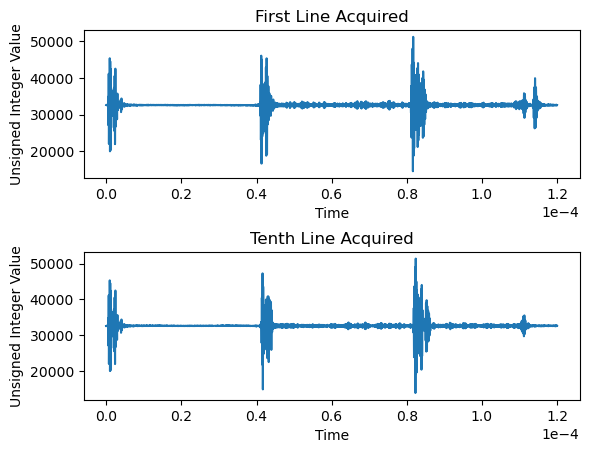

In [82]:
# The magic command to have graphs inline in the notebook
%matplotlib inline

# Packages that will allow to do math, numerical operations, array operations and plotting
import scipy as Sci
import numpy as np
import matplotlib.pyplot as plt

# Known parameters
TotLines = 26  #total lines
fs = 125e6   #sampling frequency
LineSeparation = 1  #separation between lines 1mm
c = 1500  #speed of sound

# we use a simple open command for the file (basic Python)
# REMEMBER to keep capitals if the OS is Linux !
f = open('Source Files/MultipleUSSignalsI.dat','rb')   
# we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
Lines = np.fromfile(f,count=-1,dtype=np.uint16)
f.close() #close the file
# we will now populate a 2D matrix for the lines
SamplesPerLine=int(len(Lines)/TotLines)  # the size of the array divided by the 26 lines should give the samples per line

# we arrange the data now in a 2D array since there are multiple lines
LinesRF=Lines.reshape(TotLines,SamplesPerLine,order='F').copy()  #columns,rows

# in order to plot we need a time axis that we can obtain from the sampling frequency
time=np.arange(0,SamplesPerLine/fs,1/fs)

#now we plot two lines acquired to double check (15000 samples)
plt.subplots_adjust( hspace = .5 )
plt.subplot(211)
plt.plot(time,LinesRF[0]) #first line
plt.title('First Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(212)
plt.plot(time,LinesRF[10]) #10th line
plt.title('Tenth Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

The first thing we notice here is that the data is not centered at zero since this are unsigned integers. It would be required for the calculations to eliminate this dc component and we can use what we know from the Fourier Notebook to do this.

Next, we will analyze this signal visually (zoom) to estimate the frequency of the transducer used.

We will then perform a Fourier transform to obtain the central frequency of the transducer.

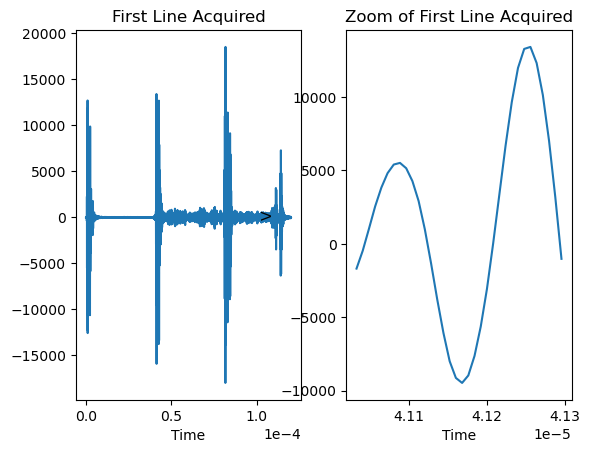

In [83]:
LinesRF=LinesRF-np.mean(LinesRF)

plt.subplots_adjust( hspace = .5 )
plt.subplot(121)
plt.plot(time,LinesRF[0]) #first line
plt.title('First Line Acquired')
plt.xlabel('Time')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

inx1=np.where(time>0.4103e-4)
inx1=inx1[0]
inx2=np.where(time>0.413e-4)
inx2=inx2[0]

plt.subplot(122)
plt.plot(time[inx1[0]:inx2[0]],LinesRF[0][inx1[0]:inx2[0]])
plt.title('Zoom of First Line Acquired')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Since 1.5 cycles of the signal are in this zoom between $0.4103\times 10^{-4}$ and $0.413\times ^{-4}$ we then have a frequency of $\frac{1}{(0.413\times 10^{-4}-0.4103\times 10^{-4})/1.5}=5.5MHz$

### Activity 1 - Add a code cell and plot again the first line but using depth of tissues instead of time as the x axis and estimate at which distance within the tissues you expect to find the first large interface.

**Write your estimation here**



We will now obtain the frequency of the signal using DFT. 

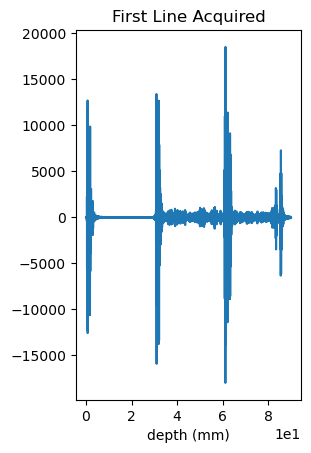

In [114]:
LinesRF=LinesRF-np.mean(LinesRF)
d=time*c/2                      
depth = d*1e3
plt.subplots_adjust( hspace = .5 )
plt.subplot(121)
plt.plot(depth,LinesRF[0]) #first line
plt.title('First Line Acquired')
plt.xlabel('depth (mm)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


First Large Interference can be seen right at the beggining between 0 and 1mm

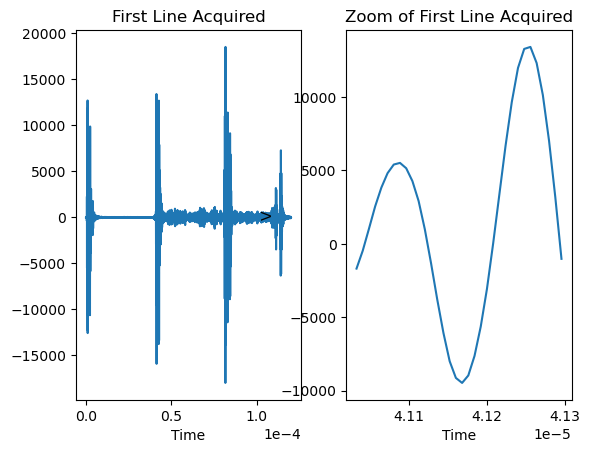

In [85]:
LinesRF=LinesRF-np.mean(LinesRF)

plt.subplots_adjust( hspace = .5 )
plt.subplot(121)
plt.plot(time,LinesRF[0]) #first line
plt.title('First Line Acquired')
plt.xlabel('Time')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

inx1=np.where(time>0.4103e-4)
inx1=inx1[0]
inx2=np.where(time>0.413e-4)
inx2=inx2[0]

plt.subplot(122)
plt.plot(time[inx1[0]:inx2[0]],LinesRF[0][inx1[0]:inx2[0]])
plt.title('Zoom of First Line Acquired')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

We can see that the frequency of that transducer is $4.97MHz$ and as you can see, using the DFT gave us more precision than estimation.

### Activity 2 - What is the frequency of this transducer with uncertainty considering the sampling frequency?

**Answer here**

Sample Freq = 125 MHz

C or Speed of Sound = 1500 

The 

## Attenuation Compensation

Tissues will attenuate the wave exponentially as a function of depth and frequency. This attenuation is usually expressed in $Np/m/MHz$. Compensating for this attenuation is called **Time-Gain-Compensation** or **TGC**. Assuming that the tissues have attenuated this signal $\alpha=4Np/m/MHz$ we will compensate for this attenuation and plot the real TGC compensated signal. Since the attenuation is exponential so we can compensate using:

$$ RF_{com}=RF e^{\mu d}\;\;\mu=\alpha f\;\;\;\;c\approx 1500m/s$$


### Activity 3 - In the following code cell: 

#### 1) Comment all lines with #? explaining the purpose of the line
#### 2) Add an appropriate and descriptive title to all plots
#### 3) Add an appropriate and descriptive label to the x axis with units
#### 4) What is the purpose of the $/2$ in the first line?

The Reason why it is divided by 2 is because we only want the distance the wave travels from the emitter to the object 



**Answer here**



Text(0.5, 0, 'Depth (mm)')

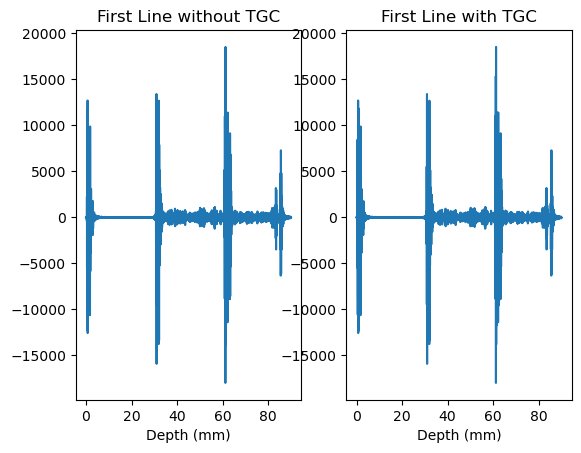

In [86]:
# Modify this code

att=4   #alpha (attenuation) in Np/m/MHz
d=time*c/2                      #?  Getting the time of the Lines by multiplying 
                                #   the time with the speed of sound and then
                                #   dividing by 2

ffatt=np.exp(att*ftx*d)         #?  getting the constant value of the TGC Equation for 
                                #   e ^ ud and into the variable ffatt
    
LinesRFC=LinesRF*ffatt          #?  Applying each line with ffatt as the LinesRF represent
                                # RF in the equation and placing them into a new set of lines


#Plotting
plt.subplot(121)
plt.plot(d*1e3,LinesRF[0])

##
plt.title('First Line without TGC')
plt.xlabel('Depth (mm)')
##

plt.subplot(122)
plt.plot(d*1e3,LinesRFC[0])

##
plt.title('First Line with TGC')
plt.xlabel('Depth (mm)')
##

## Image Formation

The first step to forming any image is determine what gives the contrast of this image. In ultrasound, the contrast is defined as the intensity of the reflexion. We then need to determine this intensity and the standard way to do this is to obtain the envelope of the signal and assign an intensity value (grayscale) to this intensity, with the brightest pixels having the highest amplitude. This is done using the magnitude of the signal after a **Hilbert transform**.

Text(0.5, 0, 'Depth (mm)')

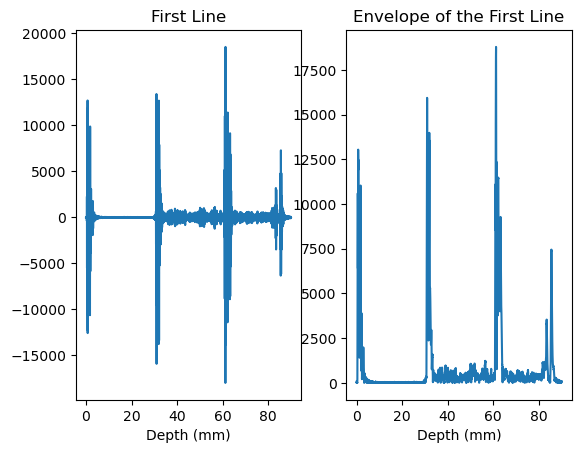

In [87]:
#importing the module for Hilbert transform
from scipy.signal import hilbert

#Performing the Hilbert Transform
LinesRFC_E=hilbert(LinesRFC[:,:])
LinesRFC_E=abs(LinesRFC_E[:,:])


#Plotting
plt.subplot(121)
plt.plot(d*1e3,LinesRFC[0,:])
plt.title('First Line')
plt.xlabel('Depth (mm)')
plt.subplot(122)
plt.plot(d*1e3,LinesRFC_E[0,:])
plt.title('Envelope of the First Line')
plt.xlabel('Depth (mm)')

## Image Rendering

We can now render the image by doing a 2D representation. We need to determine the second axis defined by the distance between the lines (known to be $1mm$) and then plotting in 2D. In addition, we need to render the pixels in a logarithmic scale for intensity (in decibels).

Text(0, 0.5, 'Length (mm)')

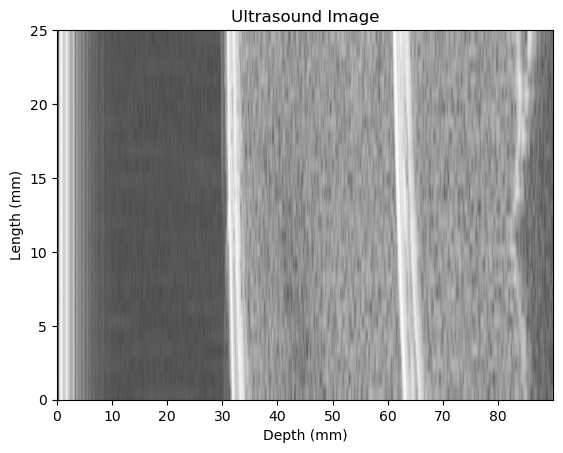

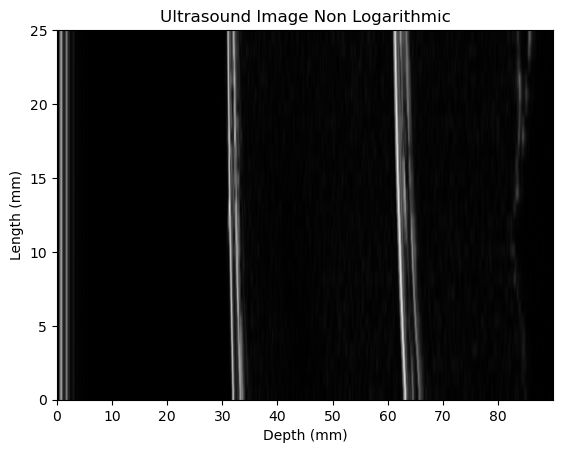

In [88]:
#the line axis
LineAxis=np.arange(0,26,1)  #defined in mm from 0 to 25 mm separated by 1 mm

#images need to be in decibels so we can see all the contrast
Image=20*np.log10(LinesRFC_E/LinesRFC_E.max())   #Image in decibels
ImageBW=LinesRFC_E                                 #Image in amplitude

#Plotting
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.imshow(Image, aspect='auto', extent=[d.min()*1e3,d.max()*1e3,LineAxis.min(),LineAxis.max()])
plt.title('Ultrasound Image')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')

plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.imshow(ImageBW, aspect='auto', extent=[d.min()*1e3,d.max()*1e3,LineAxis.min(),LineAxis.max()])
plt.title('Ultrasound Image Non Logarithmic')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')


## Image Processing

We will finally apply one of the most common filters that are used in ultrasound imaging: the median filter. This will make the image less "grainy" to the user.

We will also implement a typical "cutoff" in the displayed image, which allow the user to make black anything below a specific threshold defined in decibels.

### Activity 4 - In the cell code below implement an show an image that has cutoff so only pixels above a specific value are shown


Text(0, 0.5, 'Length (mm)')

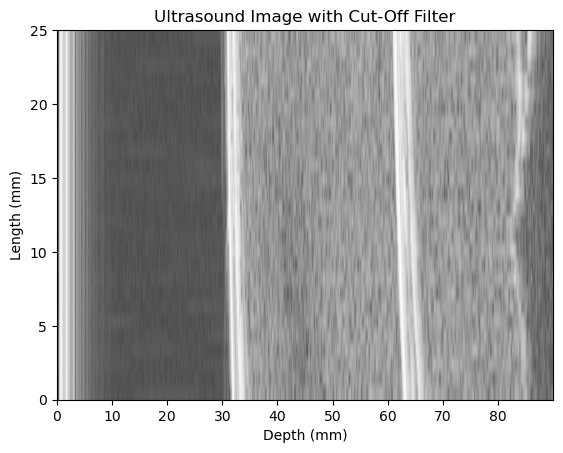

In [113]:
import numpy as np


# obtain size
i = Image.shape[1] -1
j = Image.shape[0] -1

#Get a copy of the image
ImageCopy = np.copy(Image)


#go through the image using a loop to find pixels that are greater then 200 in value 
#will be turned white.
for x in range(j):
    for y in range(i):
        if Image[x][y] > 200: 
            ImageCopy[x][y] = 255

#the line axis
LineAxis=np.arange(0,26,1)  #defined in mm from 0 to 25 mm separated by 1 mm
#images need to be in decibels so we can see all the contrast
Image=20*np.log10(LinesRFC_E/LinesRFC_E.max())   #Image in decibels
ImageBW=LinesRFC_E                                 #Image in amplitude

#Plotting
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.imshow(ImageCopy, aspect='auto', extent=[d.min()*1e3,d.max()*1e3,LineAxis.min(),LineAxis.max()])
plt.title('Ultrasound Image with Cut-Off Filter')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')


### Activity 5 - In the cell code below implement an show an image that has been median filtered


Text(0, 0.5, 'Length (mm)')

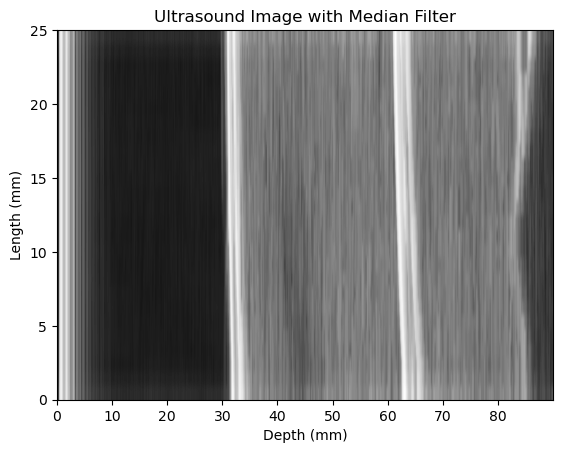

In [90]:
from scipy.signal import medfilt

# Median Filter
ImageF=medfilt(Image,5)

#the line axis
LineAxis=np.arange(0,26,1)  #defined in mm from 0 to 25 mm separated by 1 mm

#images need to be in decibels so we can see all the contrast
Image=20*np.log10(LinesRFC_E/LinesRFC_E.max())   #Image in decibels
ImageBW=LinesRFC_E                                 #Image in amplitude

#Plotting
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.imshow(ImageF, aspect='auto', extent=[d.min()*1e3,d.max()*1e3,LineAxis.min(),LineAxis.max()])
plt.title('Ultrasound Image with Median Filter')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')



## Summary

In this example, we rendered an ultrasound image from RF signals.

* Signal Processing
* Image Formation
* Image Rendering
* Image Processing (median filter)

Comments and corrections welcome!

## Assignment 4

* Complete the 5 Activities in the notebook and upload your notebook to your GitHub repository.
* Remember you should have given permissions to this **private** repository to your instructor.
* Please note you should upload all your code in the repository with those permissions, do not give permissions every time for new repositories.
* Submit on D2L the PDF of your notebook where the results of these activities can be seen. The backup PDF accounts for 10% of your mark. Note that full marks are only given if the code is on your repository and runs, but you can get partial marks from this PDF output if the code fails to run or is not accessible at the time of grading. No marks will be given if the date on GitHub is after the deadline.
* The following challenges **are for bonus points** and you can submit them later (up until the final exam date) 

## Challenge \# 8 - Sampling Frequency

The signal used in this exercise is obtained with a very high sampling frequency compared to many ultrasound systems. It is typical that we would have 4 samples per wavelength in any system. Sub-sample the signal in this example to this new sampling frequency and obtain the image again. Discuss what you observe.

In [91]:
# Add your code for Challenge 8 here


References
---------------

* Oppenheim, A. V., and A. S. Willsky. "Signals and Systems." Prentice-Hall, (1997).